Use this cell for all your imports

In [22]:
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [4]:
# Load the data using numpy's loadtxt() function
data = np.loadtxt('data.txt', skiprows=3, comments='#', dtype=int)

# Print the loaded data
print(data)


[[   1001 9304045]
 [   1001 9308122]
 [   1001 9309097]
 ...
 [9912286 9808140]
 [9912286 9810068]
 [9912286 9901023]]


Use this cell to normalize the matrix as you see fit.

In [5]:
# Get the number of nodes in the graph
n_nodes = data.max()

# Convert the edge list to a CSR matrix
adjacency_matrix = csr_matrix((np.ones(len(data)), (data[:, 0]-1, data[:, 1]-1)), shape=(n_nodes, n_nodes))

# Print the CSR matrix
print(adjacency_matrix)


  (1000, 9304044)	1.0
  (1000, 9308121)	1.0
  (1000, 9309096)	1.0
  (1000, 9311041)	1.0
  (1000, 9401138)	1.0
  (1000, 9404150)	1.0
  (1000, 9407086)	1.0
  (1000, 9408098)	1.0
  (1000, 9501029)	1.0
  (1000, 9503123)	1.0
  (1000, 9504089)	1.0
  (1000, 9504144)	1.0
  (1000, 9505024)	1.0
  (1000, 9505053)	1.0
  (1000, 9505104)	1.0
  (1000, 9505161)	1.0
  (1000, 9506047)	1.0
  (1000, 9506111)	1.0
  (1000, 9506143)	1.0
  (1000, 9507049)	1.0
  (1000, 9507157)	1.0
  (1000, 9508093)	1.0
  (1000, 9508154)	1.0
  (1000, 9510141)	1.0
  (1000, 9510224)	1.0
  :	:
  (9912290, 9802148)	1.0
  (9912290, 9908148)	1.0
  (9912290, 9912101)	1.0
  (9912291, 9406216)	1.0
  (9912291, 9606138)	1.0
  (9912291, 9608176)	1.0
  (9912291, 9702162)	1.0
  (9912291, 9702201)	1.0
  (9912291, 9707060)	1.0
  (9912291, 9710128)	1.0
  (9912291, 9711115)	1.0
  (9912291, 9711202)	1.0
  (9912291, 9811021)	1.0
  (9912291, 9811129)	1.0
  (9912291, 9811231)	1.0
  (9912291, 9811243)	1.0
  (9912291, 9901002)	1.0
  (9912291, 9904108

Apply the PageRank algorithm to the matrix you created.

In [15]:
n_nodes = data.max()
adjacency_matrix = coo_matrix((np.ones(len(data)), (data[:, 0]-1, data[:, 1]-1)), shape=(n_nodes, n_nodes))

# Compute the PageRank scores using scipy's pagerank() function
eigenvalues, eigenvectors = eigsh(adjacency_matrix, k=1, which='LM')
pagerank_scores = eigenvectors.flatten()
top_nodes = sorted(enumerate(pagerank_scores), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_nodes:
    print(f"Node: {node+1}, Score: {score:.6f}")


Node: 9905111, Score: 0.168715
Node: 210157, Score: 0.112022
Node: 207116, Score: 0.107217
Node: 201253, Score: 0.105598
Node: 110055, Score: 0.099770
Node: 210224, Score: 0.092200
Node: 7170, Score: 0.088004
Node: 211178, Score: 0.081872
Node: 203048, Score: 0.077288
Node: 303191, Score: 0.073336


Output a list of the 100 most important papers along with their importance

In [30]:
top_papers = sorted(enumerate(pagerank_scores), key=lambda x: x[1], reverse=True)[:100]
for paper, score in top_papers:
    print(f"Paper ID: {paper+1}, Importance: {score:.6f}")

Paper ID: 9905111, Importance: 0.168715
Paper ID: 210157, Importance: 0.112022
Paper ID: 207116, Importance: 0.107217
Paper ID: 201253, Importance: 0.105598
Paper ID: 110055, Importance: 0.099770
Paper ID: 210224, Importance: 0.092200
Paper ID: 7170, Importance: 0.088004
Paper ID: 211178, Importance: 0.081872
Paper ID: 203048, Importance: 0.077288
Paper ID: 303191, Importance: 0.073336
Paper ID: 204089, Importance: 0.070483
Paper ID: 9802067, Importance: 0.069538
Paper ID: 209230, Importance: 0.064113
Paper ID: 210292, Importance: 0.061061
Paper ID: 9710046, Importance: 0.060043
Paper ID: 9712253, Importance: 0.059429
Paper ID: 9802051, Importance: 0.055059
Paper ID: 205321, Importance: 0.052463
Paper ID: 304180, Importance: 0.052065
Paper ID: 206062, Importance: 0.051860
Paper ID: 7195, Importance: 0.050207
Paper ID: 303172, Importance: 0.049514
Paper ID: 303060, Importance: 0.049041
Paper ID: 9809039, Importance: 0.048980
Paper ID: 201210, Importance: 0.048564
Paper ID: 101126, Impor

Visualize your results

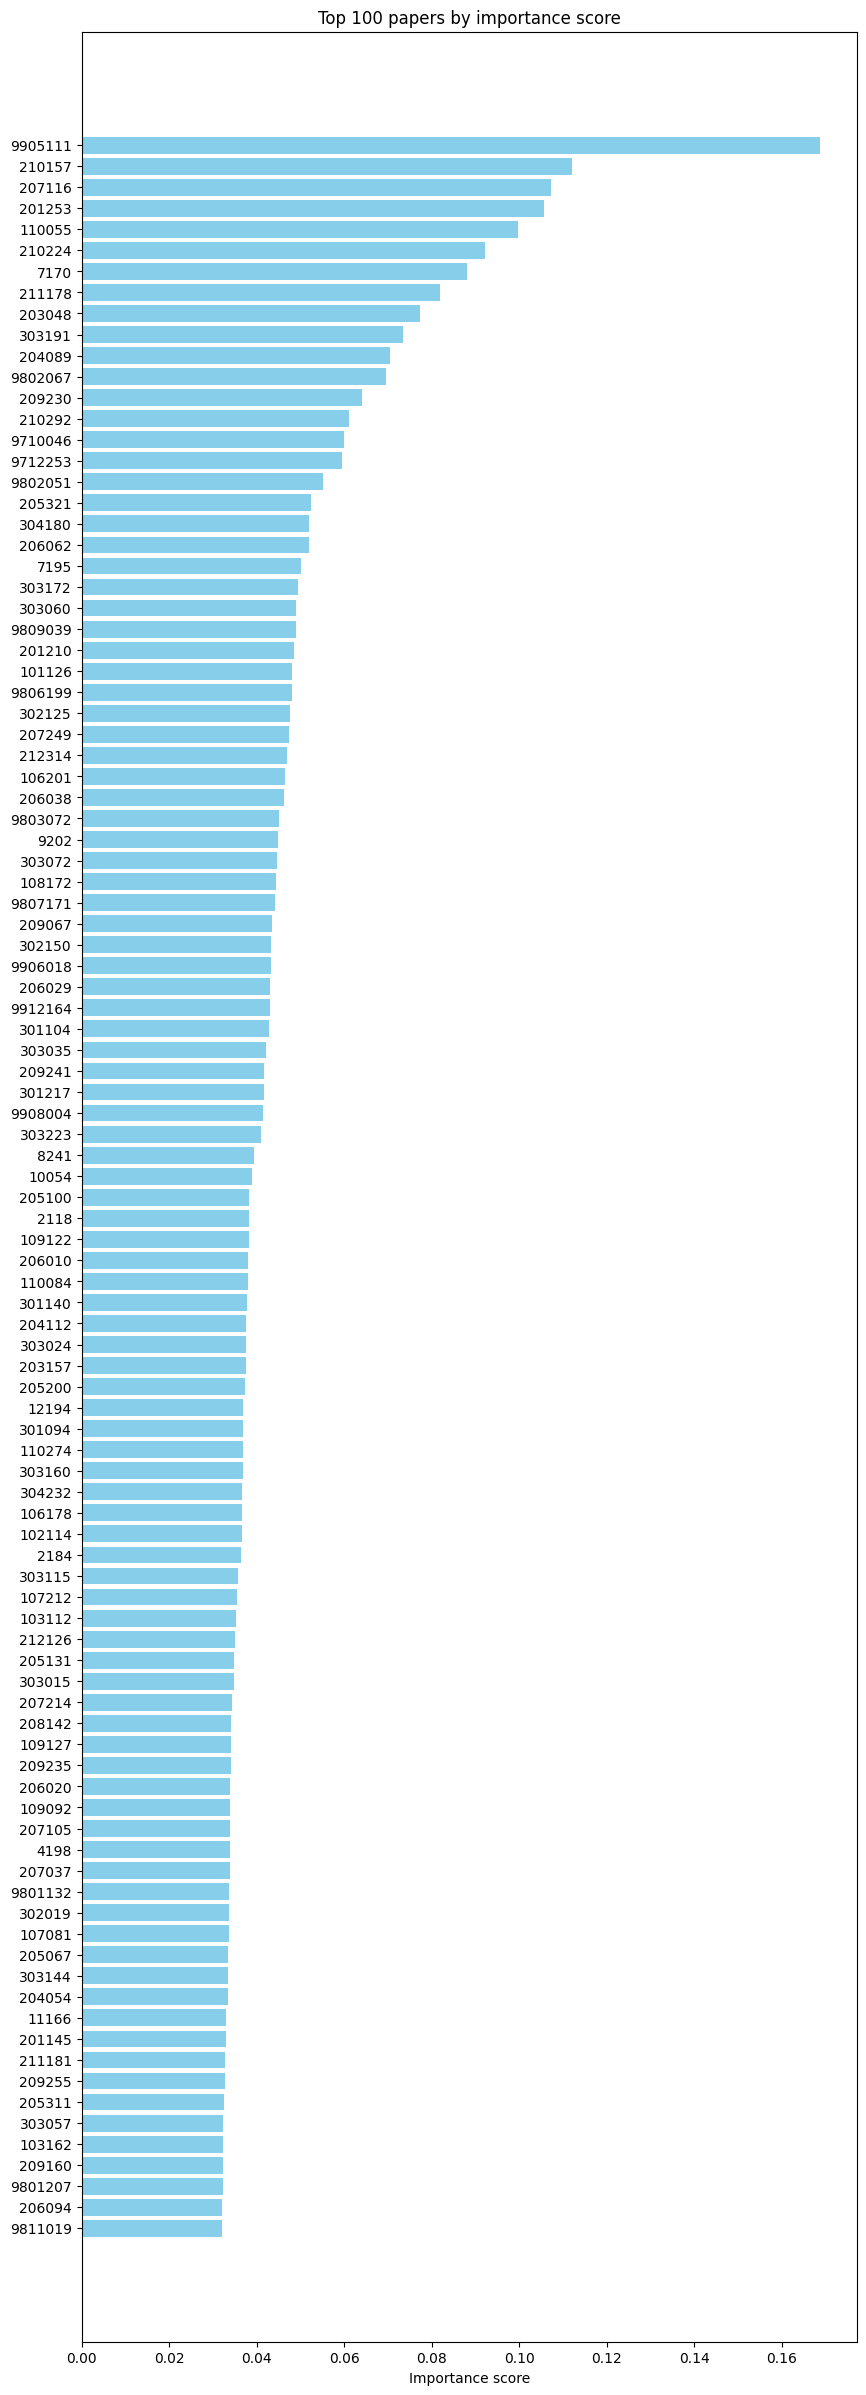

In [31]:
fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(range(len(paper_ids)), scores, align='center', color='skyblue')
ax.set_yticks(range(len(paper_ids)))
ax.set_yticklabels(paper_ids)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Importance score')
ax.set_title('Top 100 papers by importance score')

plt.show()
